In [1]:
import torch
import pykeen
import pandas as pd
from pykeen import predict
from pykeen.pipeline import pipeline
from pykeen.hpo import hpo_pipeline
from pykeen.triples import TriplesFactory
import numpy as np
from pykeen.utils import set_random_seed
from matplotlib import pyplot as plt


file_path = 'C.1_query.tsv'
tf = TriplesFactory.from_path(file_path, delimiter="\t")
training, testing = tf.split([0.85, 0.15], random_state=2025)
training, validation = training.split([0.8, 0.2], random_state=2025)
device = "cuda" if torch.cuda.is_available() else "cpu"

pd.set_option('display.max_columns', None)


def graph_display(x, y, title):
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(x, y, '-o')
    plt.xlabel('Trial Number')
    plt.ylabel('Objective Metric Value')
    plt.title(title)
    plt.grid(True)  # Optional: add grid for readability
    plt.xticks(x)
    plt.show()


In [2]:
transHResults = pd.read_csv('transh_hpo_result/trials.tsv', sep='\t')
rotatEResults = pd.read_csv('rotate_hpo_result/trials.tsv', sep='\t')
complExResults = pd.read_csv('complex_hpo_result/trials.tsv', sep='\t')
convKBResults = pd.read_csv('convkb_hpo_result/trials.tsv', sep='\t')

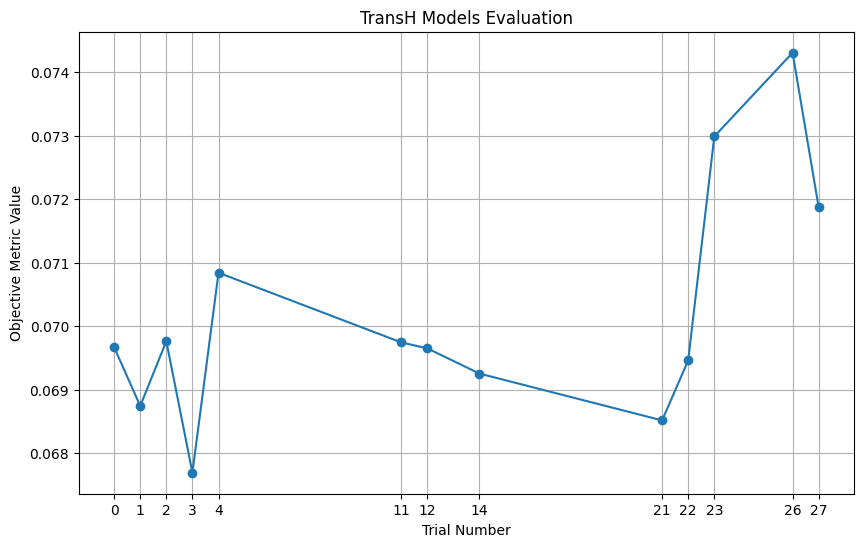

In [3]:
transHResults = transHResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 'params_model.scoring_fct_norm',
                'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                'params_regularizer.weight', 'params_training.batch_size', 'params_training.num_epochs', 'state']]
transHResults = transHResults[transHResults.state=='COMPLETE']
transHResults
graph_display(transHResults.number, transHResults.value, 'TransH Models Evaluation')

In [4]:
transHResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
transHResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,model.scoring_fct_norm,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,regularizer.weight,training.batch_size,training.num_epochs,state
26,26,0.074306,2.347374,256,2,7,0.000576,0.000418,0.614466,128,150,COMPLETE
23,23,0.072987,2.127018,256,1,1,0.000631,0.000803,0.992767,32,150,COMPLETE
27,27,0.071871,2.761690,192,2,4,0.000784,0.000423,0.652284,128,150,COMPLETE
4,4,0.070843,1.704889,128,2,4,0.000178,0.000719,0.257795,32,50,COMPLETE
2,2,0.069765,2.151903,256,1,7,0.000461,0.000667,0.984158,2048,150,COMPLETE
11,11,0.069747,1.790617,256,1,1,0.000938,0.000993,0.700027,32,100,COMPLETE
0,0,0.069671,1.068963,256,2,7,0.000224,0.000545,0.387305,16,150,COMPLETE
12,12,0.069653,2.187545,256,2,4,0.000525,0.000713,0.967052,128,50,COMPLETE
22,22,0.069463,1.594006,256,1,1,0.000662,0.000883,0.901288,32,100,COMPLETE
14,14,0.069255,1.878663,192,1,7,0.000814,0.000706,0.664242,2048,100,COMPLETE


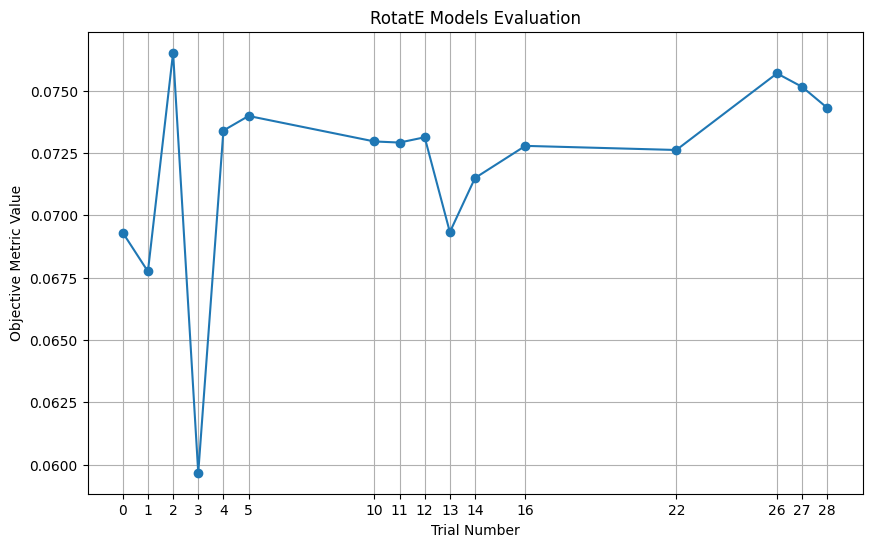

In [5]:
rotatEResults = rotatEResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 
                               'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                               'params_training.batch_size', 'params_training.num_epochs', 'state']]
rotatEResults = rotatEResults[rotatEResults.state=='COMPLETE']
graph_display(rotatEResults.number, rotatEResults.value, 'RotatE Models Evaluation')

In [6]:
rotatEResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
rotatEResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,training.batch_size,training.num_epochs,state
2,2,0.076519,1.006098,128,4,0.000176,0.000425,32,150,COMPLETE
26,26,0.075690,0.383921,192,7,0.000528,0.000398,16,150,COMPLETE
27,27,0.075149,0.418239,256,7,0.000564,0.000363,16,150,COMPLETE
28,28,0.074305,0.374853,256,7,0.000598,0.000449,16,150,COMPLETE
5,5,0.073983,2.977866,192,7,0.000431,0.000354,16,150,COMPLETE
4,4,0.073397,1.553215,192,10,0.000155,0.000776,32,100,COMPLETE
12,12,0.073128,2.852877,128,7,0.000108,0.000234,16,150,COMPLETE
10,10,0.072960,2.249403,128,4,0.000876,0.000254,32,50,COMPLETE
11,11,0.072916,2.943038,192,7,0.000461,0.000431,16,150,COMPLETE
16,16,0.072783,0.786519,128,7,0.000572,0.000607,32,150,COMPLETE


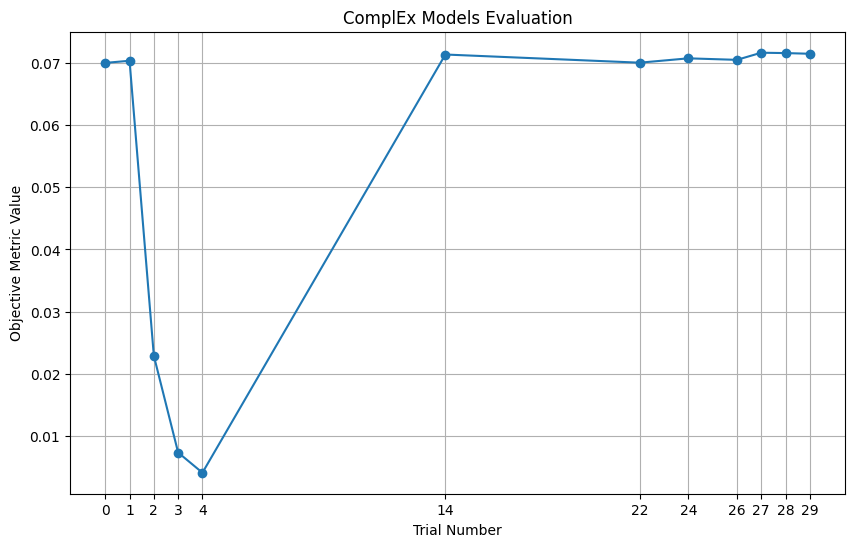

In [7]:
complExResults = complExResults[['number', 'value', 'params_model.embedding_dim', 
                               'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                               'params_training.batch_size', 'params_training.num_epochs', 'state']]
complExResults = complExResults[complExResults.state=='COMPLETE']
graph_display(complExResults.number, complExResults.value, 'ComplEx Models Evaluation')

In [8]:
complExResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
complExResults.sort_values('value', ascending=False)

,number,value,model.embedding_dim,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,training.batch_size,training.num_epochs,state
27,27,0.071639,128,1,0.000765,0.000359,16,50,COMPLETE
28,28,0.071582,128,1,0.000721,0.000333,16,50,COMPLETE
29,29,0.071472,128,1,0.000788,0.000285,16,50,COMPLETE
14,14,0.071351,128,1,0.000548,0.000379,64,100,COMPLETE
24,24,0.070736,128,1,0.000451,0.000366,16,50,COMPLETE
26,26,0.070493,192,1,0.000600,0.000376,16,50,COMPLETE
1,1,0.070348,192,10,0.000574,0.000149,32,50,COMPLETE
22,22,0.070038,128,1,0.000431,0.000243,32,100,COMPLETE
0,0,0.070004,128,1,0.000402,0.000257,32,100,COMPLETE
2,2,0.022898,128,4,0.000950,0.000521,256,150,COMPLETE


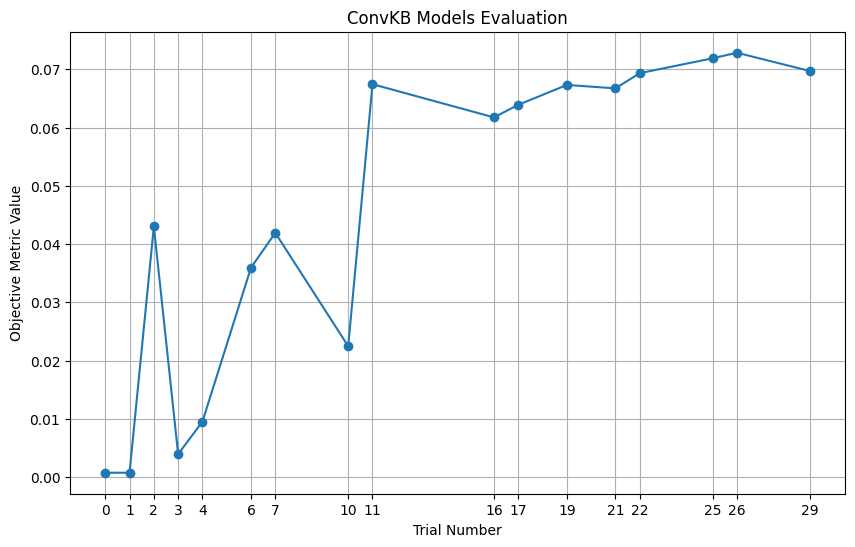

In [9]:
convKBResults = convKBResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 'params_model.hidden_dropout_rate',
                               'params_model.num_filters', 'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr',
                               'params_optimizer.weight_decay', 'params_regularizer.weight', 'params_training.batch_size', 
                               'params_training.num_epochs', 'state']]
convKBResults = convKBResults[convKBResults.state=='COMPLETE']
graph_display(convKBResults.number, convKBResults.value, 'ConvKB Models Evaluation')

In [10]:
convKBResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
convKBResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,model.hidden_dropout_rate,model.num_filters,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,regularizer.weight,training.batch_size,training.num_epochs,state
26,26,0.072852,2.282755,256,0.3,64,10,0.000583,0.000280,0.208973,64,50,COMPLETE
25,25,0.071897,2.377215,192,0.4,96,10,0.000480,0.000375,0.117687,64,100,COMPLETE
29,29,0.069716,2.617083,128,0.3,64,10,0.000470,0.000272,0.124155,64,50,COMPLETE
22,22,0.069339,1.498993,192,0.4,96,7,0.000717,0.000646,0.117554,256,100,COMPLETE
11,11,0.067453,0.702802,256,0.4,128,4,0.000198,0.000117,0.013020,256,150,COMPLETE
19,19,0.067324,1.549313,192,0.4,96,7,0.000420,0.000633,0.024826,256,100,COMPLETE
21,21,0.066733,1.486790,192,0.4,96,7,0.000655,0.000670,0.016787,256,100,COMPLETE
17,17,0.063912,1.478923,192,0.4,96,7,0.000109,0.000735,0.034566,256,100,COMPLETE
16,16,0.061749,1.146826,256,0.4,128,7,0.000107,0.000610,0.046425,256,100,COMPLETE
2,2,0.043030,0.947813,256,0.5,128,1,0.000181,0.000171,0.719563,4096,150,COMPLETE
